In [1]:
%matplotlib inline
from vic.dataloader import load_orl, load_yale
from vic.models import Fisherfaces
from vic.metrics import get_metrics_vs_train_size, get_average_acc_vs_train_size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


Fisherfaces applies PCA then LDA. This requires at least 2 training samples per class (N > C), 
so train sizes start at 2. Test indices stay fixed across splits for fair comparison.


# ORL Dataset Experiments (Fisherfaces)


In [ ]:
data = load_orl("../data/ORL")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(
    f"Loaded ORL dataset with {max_idx} subjects with at least {min_length} images each."
)

Loaded ORL dataset with 40 subjects with at least 10 images each.


In [3]:
model = Fisherfaces()
n_test = 3
train_sizes = np.arange(2, min_length - n_test + 1)
print(f"Evaluating Fisherfaces on ORL dataset with train sizes: {train_sizes}")
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, data, n_test=n_test
)

Evaluating Fisherfaces on ORL dataset with train sizes: [2 3 4 5 6 7]


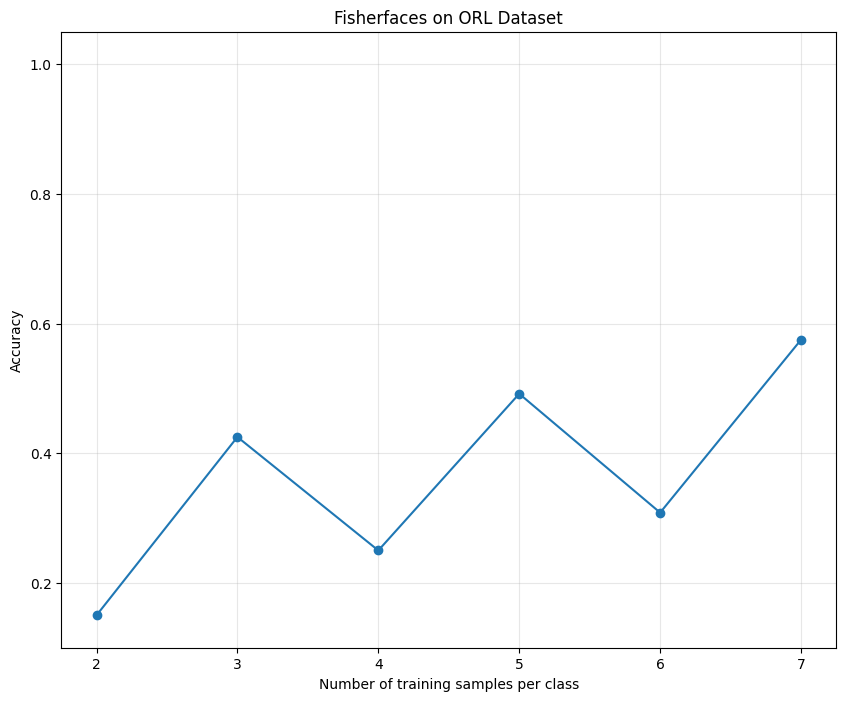

In [4]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("Fisherfaces on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

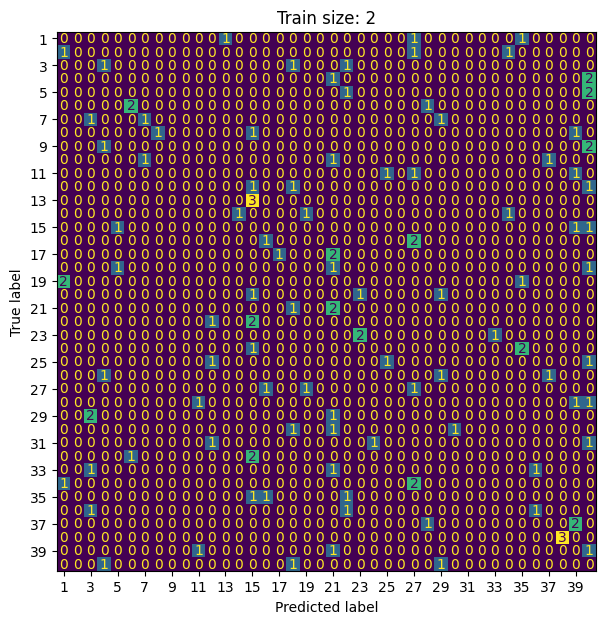

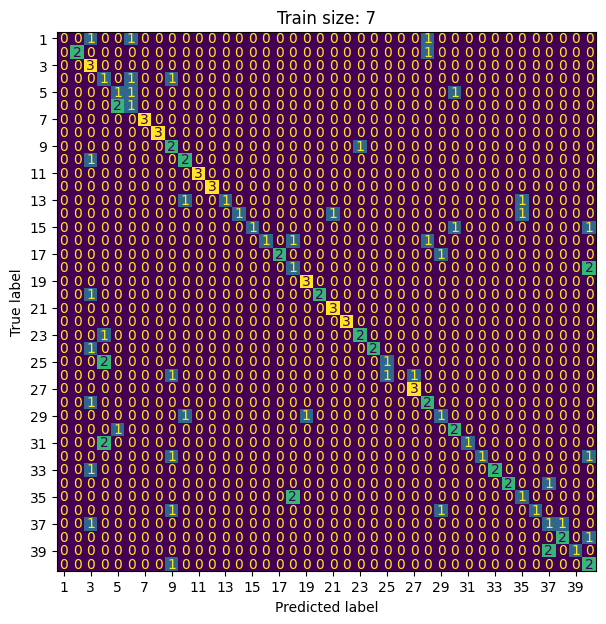

In [5]:
sizes_to_plot = [train_sizes[0], train_sizes[-1]]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    labels = np.arange(1, cm.shape[0] + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(colorbar=False, ax=ax)

    tick_positions = np.arange(0, cm.shape[0], 2)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(labels[tick_positions])
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(labels[tick_positions])

    plt.title(f"Train size: {size}")
    plt.show()

In [6]:
n_exp = 3
mean_scores, std_scores = get_average_acc_vs_train_size(
    model, train_sizes, data, n_exp=n_exp
)

Experiments: 100%|██████████| 3/3 [00:05<00:00,  1.85s/it]


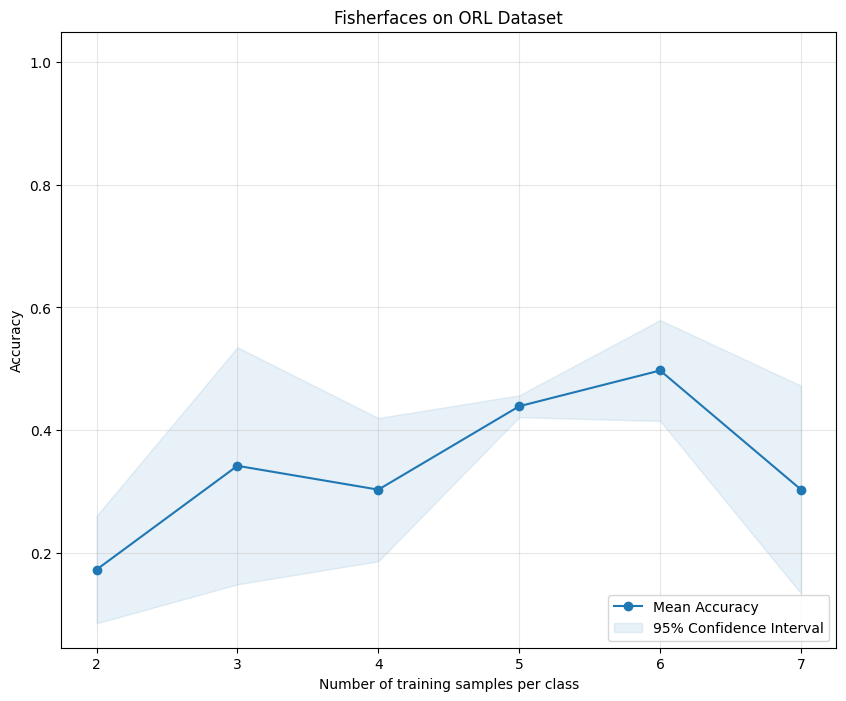

In [7]:
sorted_sizes = sorted(mean_scores.keys())
means = np.array([mean_scores[k] for k in sorted_sizes])
stds = np.array([std_scores[k] for k in sorted_sizes])
ci = 1.96 * stds / np.sqrt(n_exp)

fig = plt.figure(figsize=(10, 8))

plt.plot(sorted_sizes, means, marker="o", color="tab:blue", label="Mean Accuracy")

plt.fill_between(
    sorted_sizes,
    means - ci,
    means + ci,
    alpha=0.1,
    color="tab:blue",
    label="95% Confidence Interval",
)

plt.title("Fisherfaces on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")

plt.xticks(sorted_sizes)

plt.grid(True, alpha=0.3)
plt.legend(loc="lower right")

y_min = max(0, min(means - stds) - 0.05)
plt.ylim(y_min, 1.05)

plt.show()

# Yale Dataset Experiments (Fisherfaces)


In [8]:
data = load_yale("../data/Yale")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(
    f"Loaded Yale dataset with {max_idx} subjects with at least {min_length} images each."
)

Loaded Yale dataset with 15 subjects with at least 11 images each.


In [9]:
model = Fisherfaces()
n_test = 3
train_sizes = np.arange(2, min_length - n_test + 1)
print(f"Evaluating Fisherfaces on Yale dataset with train sizes {train_sizes}")
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, data, n_test=n_test
)

Evaluating Fisherfaces on Yale dataset with train sizes [2 3 4 5 6 7 8]


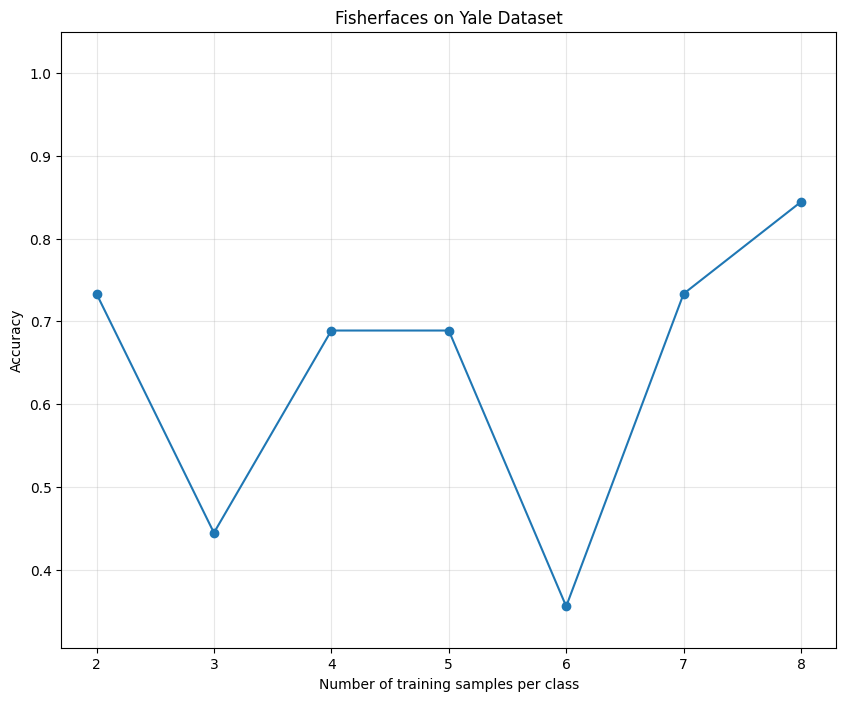

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("Fisherfaces on Yale Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

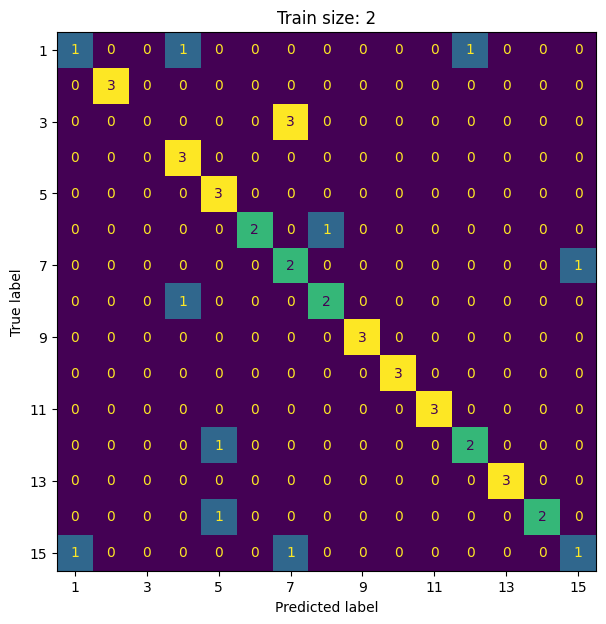

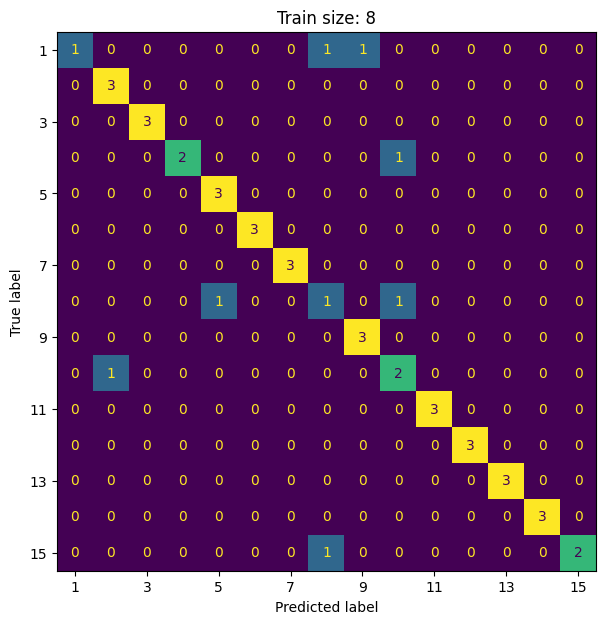

In [11]:
sizes_to_plot = [train_sizes[0], train_sizes[-1]]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    labels = np.arange(1, cm.shape[0] + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(colorbar=False, ax=ax)

    tick_positions = np.arange(0, cm.shape[0], 2)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(labels[tick_positions])
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(labels[tick_positions])

    plt.title(f"Train size: {size}")
    plt.show()